In [1]:
import numpy as np
import matplotlib as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import plotly.graph_objects as go

# Questão 1:

Modele os seguintes sólidos/objetos

a. cano reto, definida usando uma base em um raio e comprimento.

b. cano curvado, definida usando uma base em um raio e uma curva
(Bezier ou Hermite).

c. cilindro, com base no raio da base e na altura;

d. paralelepípedo (hiper retângulo) com base, altura e comprimento;

e. linha reta, de tamanho 4; e

f. para cada um dos sólidos acima (com exceção da reta)

crie uma malha de polígonos (triângulos) usando algum algoritmo próprio
(como visto em sala) ou o algoritmo marching cubes (não precisa
implementar esse algoritmo, basta usar de alguma API)

Na construção dos sólidos, crie uma função que retorne o sólido ( ou seja,
retorne a matriz de vértices e arestas). Perceba que cada objeto é descrito
indiretamente (no caso do cone, por exemplo, pelo raio e pela altura). A origem
do objeto pode ser definida de forma fixa dentro da função ou, opcionalmente,
pode ser passada também como parâmetro da função.

Item A

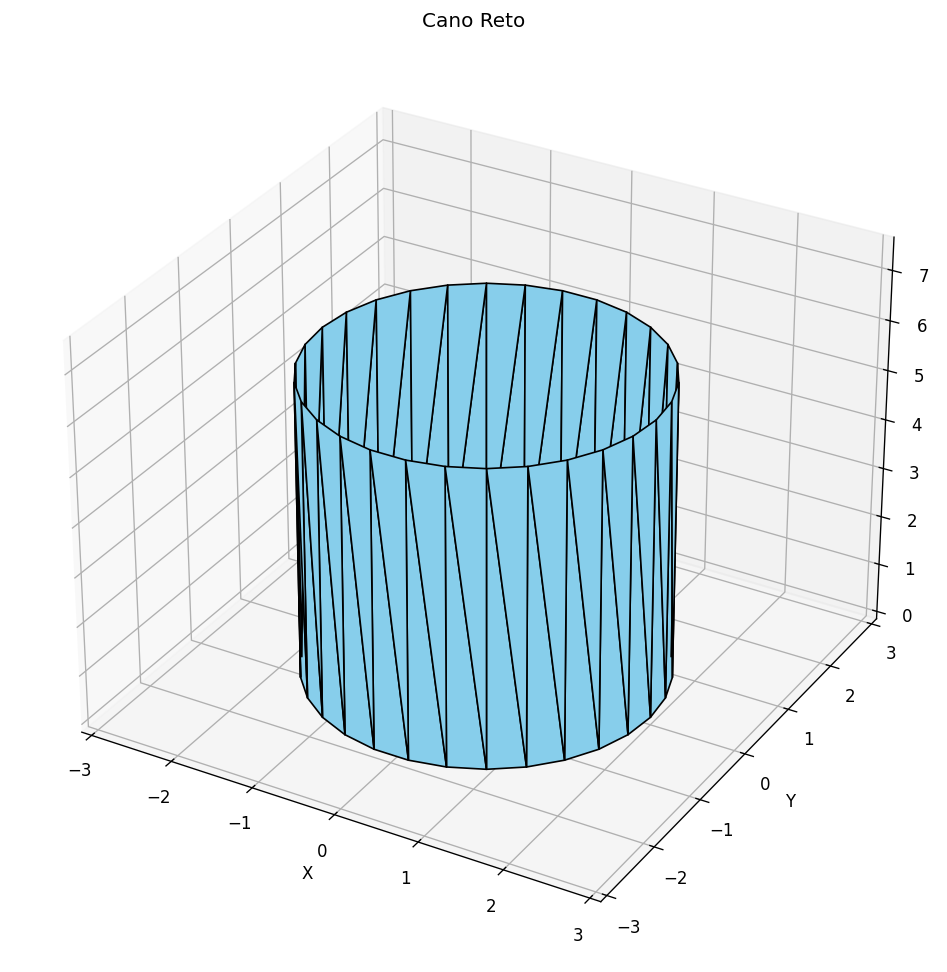

In [2]:
from Objetos.Cano_reto import plotar_cano_reto

# Plota o cano reto
plotar_cano_reto(raio=2, comprimento=6, n_segments=30)

In [3]:
from Objetos.Cano_reto import gerar_cano_reto

raio = 2.0
comprimento = 5.0
n_segments = 40
origem = (0, 0, 0)

# Gera vértices e arestas
vertices, arestas = gerar_cano_reto(raio, comprimento, n_segments, origem)

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

print("Vértices =", vertices)
print("\nArestas =", arestas)

Vértices = [[ 2.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.97537668e+00  3.12868930e-01  0.00000000e+00  1.00000000e+00]
 [ 1.90211303e+00  6.18033989e-01  0.00000000e+00  1.00000000e+00]
 [ 1.78201305e+00  9.07980999e-01  0.00000000e+00  1.00000000e+00]
 [ 1.61803399e+00  1.17557050e+00  0.00000000e+00  1.00000000e+00]
 [ 1.41421356e+00  1.41421356e+00  0.00000000e+00  1.00000000e+00]
 [ 1.17557050e+00  1.61803399e+00  0.00000000e+00  1.00000000e+00]
 [ 9.07980999e-01  1.78201305e+00  0.00000000e+00  1.00000000e+00]
 [ 6.18033989e-01  1.90211303e+00  0.00000000e+00  1.00000000e+00]
 [ 3.12868930e-01  1.97537668e+00  0.00000000e+00  1.00000000e+00]
 [ 1.22464680e-16  2.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-3.12868930e-01  1.97537668e+00  0.00000000e+00  1.00000000e+00]
 [-6.18033989e-01  1.90211303e+00  0.00000000e+00  1.00000000e+00]
 [-9.07980999e-01  1.78201305e+00  0.00000000e+00  1.00000000e+00]
 [-1.17557050e+00  1.61803399e+00  0.00000000e+00  

Item B

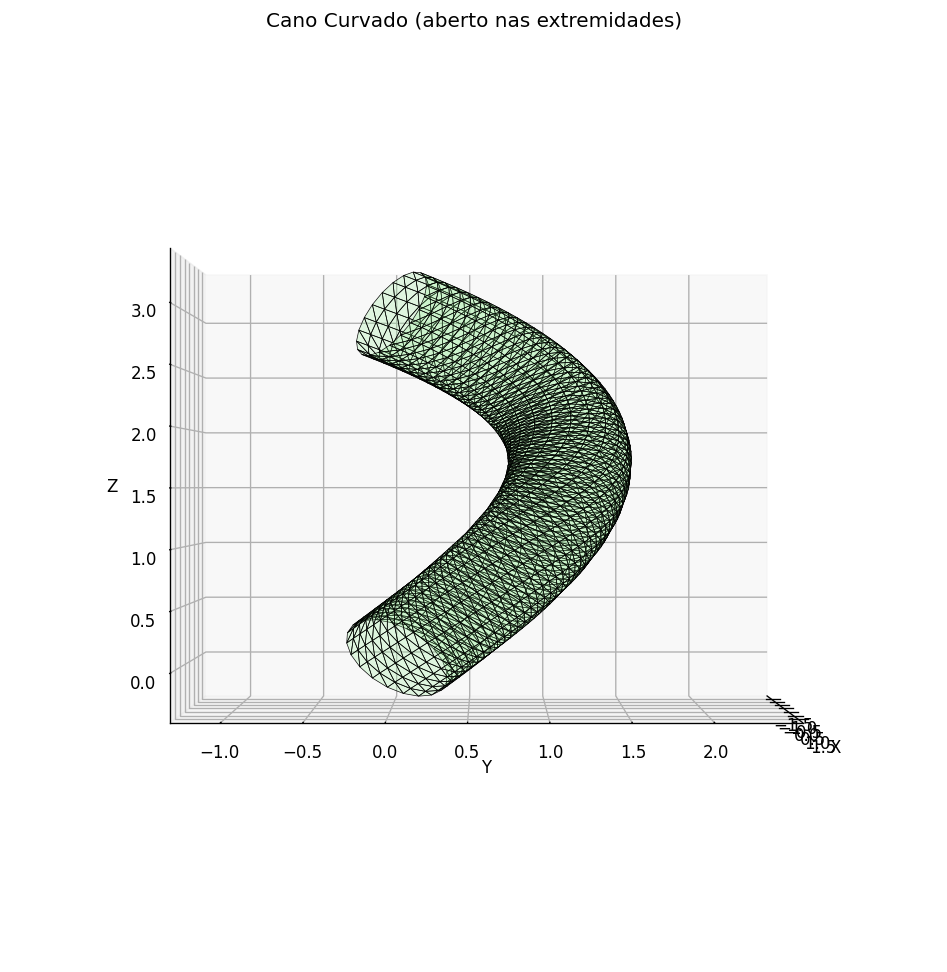

In [4]:
from Objetos.Cano_curvado import plotar_cano_curvado

# Exemplo de pontos de controle para Bezier 3D
pontos_ctrl = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [-1, 2, 2],
    [0, 0, 3]
])

plotar_cano_curvado(raio=0.4, pontos_ctrl=pontos_ctrl, n_amostras=80, n_lados=20)

In [5]:
from Objetos.Cano_curvado import gerar_cano_curvado

pontos_ctrl = np.array([
    [0, 0, 0],
    [3, 3, 0],
    [6, 0, 0],
    [9, 3, 0]
])

vertices, arestas = gerar_cano_curvado(
    raio=1.0,
    pontos_ctrl=pontos_ctrl,
    n_amostras=50,
    n_lados=30,
    origem=np.array([0, 0, 0]),
    n_subdiv=1
)

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

print("Vértices =", vertices)
print("\nArestas =", arestas)

Vértices = [[-0.6924338261995915, 0.7214813901512596, 0.0], [-0.6773024857640594, 0.7057152907505453, 0.20791169081775931], [-0.632569776642723, 0.6591060467463523, 0.40673664307580015], [-0.5601907328755382, 0.5836907057576308, 0.5877852522924731], [-0.4633286659883169, 0.4827652800685443, 0.7431448254773941], [-0.3462169130997958, 0.36074069507562984, 0.8660254037844386], [-0.2139738197757425, 0.22295001068200104, 0.9510565162951535], [-0.07237904376718489, 0.07541534098872164, 0.9945218953682733], [0.07237904376718465, -0.0754153409887214, 0.9945218953682734], [0.21397381977574242, -0.22295001068200096, 0.9510565162951536], [0.3462169130997956, -0.3607406950756296, 0.8660254037844387], [0.4633286659883167, -0.482765280068544, 0.7431448254773945], [0.5601907328755382, -0.5836907057576307, 0.5877852522924732], [0.6325697766427228, -0.6591060467463522, 0.40673664307580043], [0.6773024857640594, -0.7057152907505453, 0.20791169081775973], [0.6924338261995915, -0.7214813901512596, 1.22464

Item C

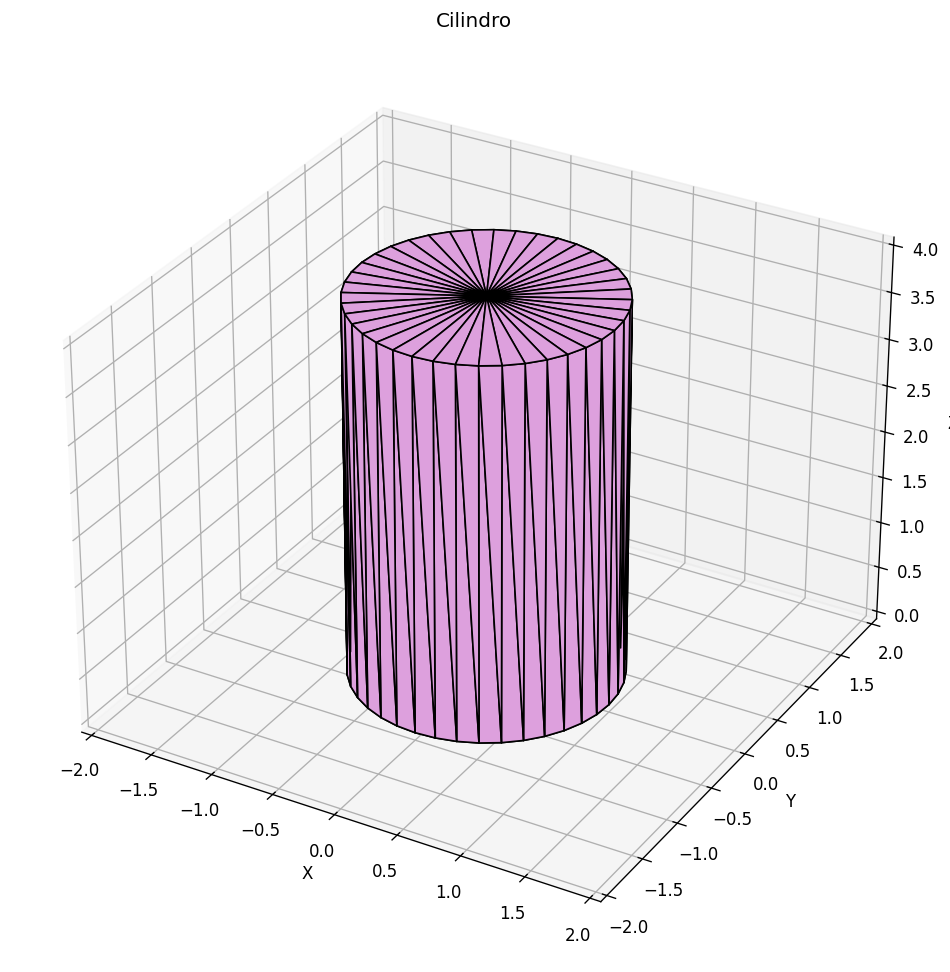

In [6]:
from Objetos.Cilindro import plotar_cilindro

# Parâmetros do cilindro
raio = 1.0
altura = 4.0

# Plotagem
plotar_cilindro(
    raio=raio,
    altura=altura,
    n_segments=40,
    n_subdiv=1,
    cor="plum"
)


In [7]:
from Objetos.Cilindro import constroi_cilindro
import numpy as np

# Parâmetros
raio = 2.0
altura = 4.0
n_segments = 40
n_subdiv = 2
origem = np.array([0, 0, 0])

# Geração das listas
vertices, arestas = constroi_cilindro(
    raio=raio,
    altura=altura,
    n_segments=n_segments,
    origem=origem,
    n_subdiv=n_subdiv
)

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Impressão
print("Vértices =", vertices)
print("\nArestas =", arestas)

Vértices = [[2.0, 0.0, 0.0], [2.0, 0.0, 2.0], [2.0, 0.0, 4.0], [1.9876883405951378, 0.15643446504023087, 0.0], [1.9876883405951378, 0.15643446504023087, 2.0], [1.9753766811902755, 0.31286893008046174, 0.0], [2.0, 0.0, 4.0], [1.9876883405951378, 0.15643446504023087, 4.0], [1.9753766811902755, 0.31286893008046174, 4.0], [1.9876883405951378, 0.15643446504023087, 2.0], [1.9753766811902755, 0.31286893008046174, 2.0], [1.9753766811902755, 0.31286893008046174, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [2.0, 0.0, 0.0], [0.9876883405951378, 0.15643446504023087, 0.0], [1.9876883405951378, 0.15643446504023087, 0.0], [1.9753766811902755, 0.31286893008046174, 0.0], [0.0, 0.0, 4.0], [0.9876883405951378, 0.15643446504023087, 4.0], [1.9753766811902755, 0.31286893008046174, 4.0], [1.0, 0.0, 4.0], [1.9876883405951378, 0.15643446504023087, 4.0], [2.0, 0.0, 4.0], [1.9753766811902755, 0.31286893008046174, 0.0], [1.9753766811902755, 0.31286893008046174, 2.0], [1.9753766811902755, 0.31286893008046174, 4.0], [1

Item D

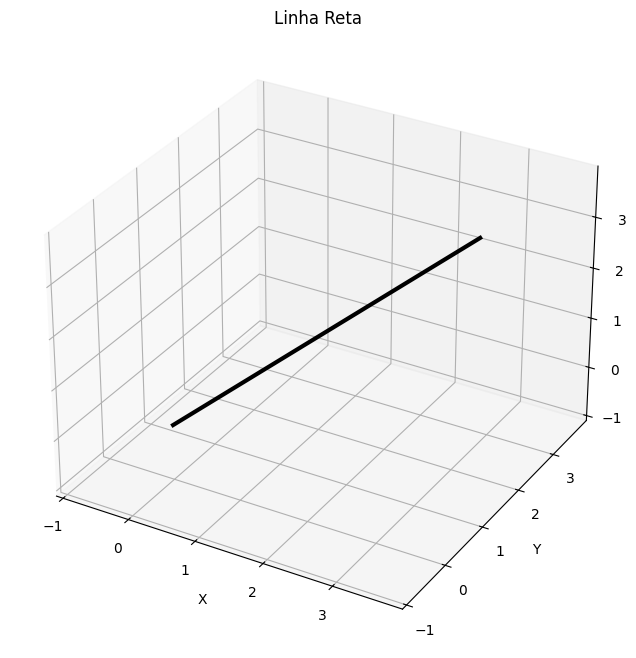

In [8]:
from Objetos.Linha_reta import plotar_linha

# Parâmetros
comprimento = 5.0
direcao = np.array([1, 1, 1])
origem = np.array([0, 0, 0])

# Plotagem
plotar_linha(
    comprimento=comprimento,
    direcao=direcao,
    origem=origem,
    cor="black"
)


In [9]:
from Objetos.Linha_reta import constroi_linha_reta

# Parâmetros
comprimento = 5.0
direcao = np.array([1, 1, 1])
origem = np.array([0, 0, 0])

# Geração das listas
vertices, arestas = constroi_linha_reta(
    comprimento=comprimento,
    direcao=direcao,
    origem=origem
)

# Impressão completa
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

print("Vértices =", vertices)
print("\nArestas =", arestas)

Vértices = [[0, 0, 0], [2.886751345948129, 2.886751345948129, 2.886751345948129]]

Arestas = [[0, 1]]


Item E

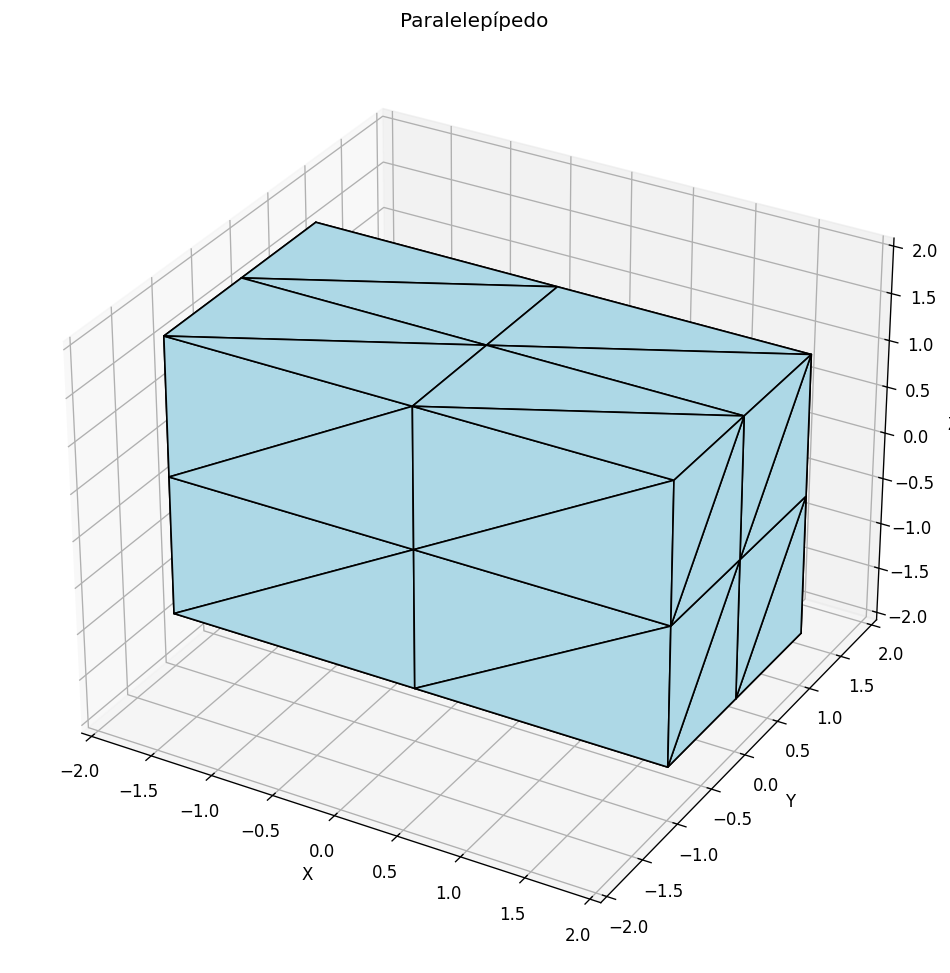

In [10]:
from Objetos.Paralelepipedo import plotar_paralelepipedo

# Parâmetros do paralelepípedo
comprimento = 4
largura = 2
altura = 3

# Plotagem
plotar_paralelepipedo(
    comprimento=comprimento,
    largura=largura,
    altura=altura,
    n_subdiv=2,
    cor="lightblue"
)

In [11]:
from Objetos.Paralelepipedo import constroi_paralelepipedo

# Parâmetros do paralelepípedo
comprimento = 4
largura = 2
altura = 3
n_subdiv = 2
origem = np.array([0, 0, 0])

# Geração das listas
vertices, arestas = constroi_paralelepipedo(
    comprimento=comprimento,
    largura=largura,
    altura=altura,
    origem=origem,
    n_subdiv=n_subdiv
)

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

print("Vértices =", vertices)
print("\nArestas =", arestas)

Vértices = [[-2.0, -1.0, -1.5], [0.0, 0.0, -1.5], [2.0, 1.0, -1.5], [0.0, -1.0, -1.5], [2.0, 0.0, -1.5], [2.0, -1.0, -1.5], [-2.0, -1.0, -1.5], [-2.0, 0.0, -1.5], [-2.0, 1.0, -1.5], [0.0, 0.0, -1.5], [0.0, 1.0, -1.5], [2.0, 1.0, -1.5], [-2.0, -1.0, 1.5], [0.0, 0.0, 1.5], [2.0, 1.0, 1.5], [-2.0, 0.0, 1.5], [0.0, 1.0, 1.5], [-2.0, 1.0, 1.5], [-2.0, -1.0, 1.5], [0.0, -1.0, 1.5], [2.0, -1.0, 1.5], [0.0, 0.0, 1.5], [2.0, 0.0, 1.5], [2.0, 1.0, 1.5], [-2.0, -1.0, -1.5], [0.0, -1.0, 0.0], [2.0, -1.0, 1.5], [-2.0, -1.0, 0.0], [0.0, -1.0, 1.5], [-2.0, -1.0, 1.5], [-2.0, -1.0, -1.5], [0.0, -1.0, -1.5], [2.0, -1.0, -1.5], [0.0, -1.0, 0.0], [2.0, -1.0, 0.0], [2.0, -1.0, 1.5], [2.0, -1.0, -1.5], [2.0, 0.0, 0.0], [2.0, 1.0, 1.5], [2.0, -1.0, 0.0], [2.0, 0.0, 1.5], [2.0, -1.0, 1.5], [2.0, -1.0, -1.5], [2.0, 0.0, -1.5], [2.0, 1.0, -1.5], [2.0, 0.0, 0.0], [2.0, 1.0, 0.0], [2.0, 1.0, 1.5], [2.0, 1.0, -1.5], [0.0, 1.0, 0.0], [-2.0, 1.0, 1.5], [2.0, 1.0, 0.0], [0.0, 1.0, 1.5], [2.0, 1.0, 1.5], [2.0, 1.0, -

Item F

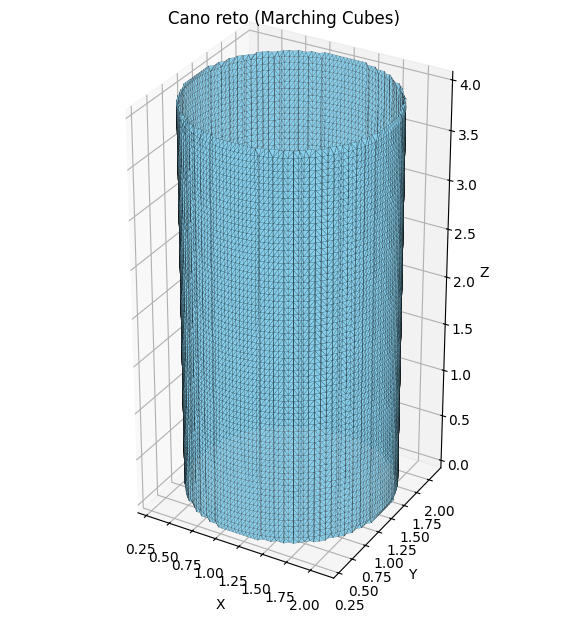

In [12]:
# Cano reto
from Objetos.Cano_reto import plotar_cano_marching_cubes


plotar_cano_marching_cubes(raio=1, comprimento=4, grid_size=64)

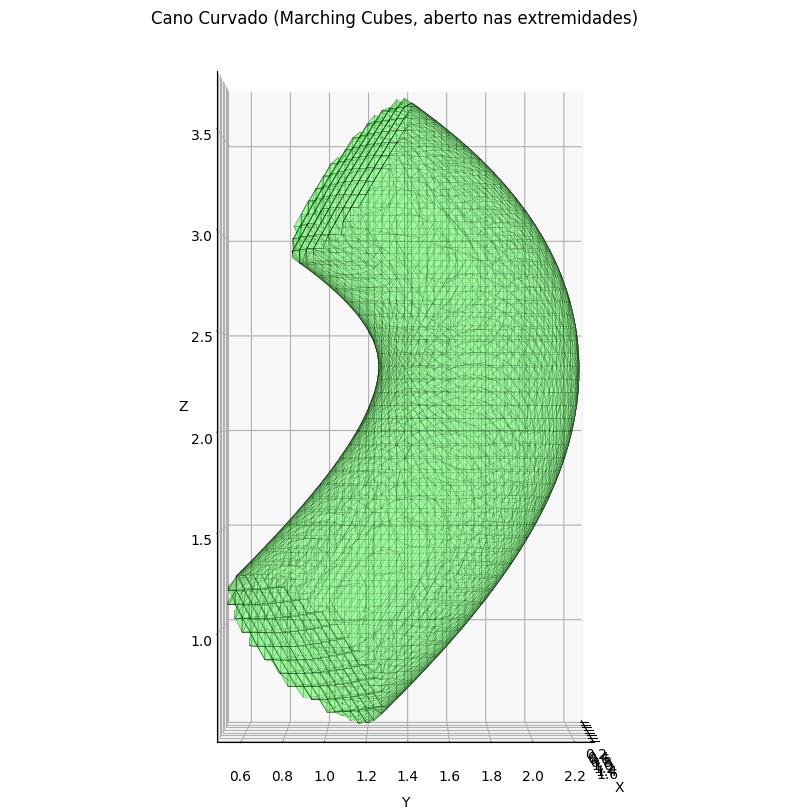

In [13]:
# Cano Curvado
from Objetos.Cano_curvado import plotar_cano_curvado_marching_cubes
import numpy as np
pontos_ctrl = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [-1, 2, 2],
    [0, 0, 3]
])

plotar_cano_curvado_marching_cubes(raio=0.5, pontos_ctrl=pontos_ctrl, grid_size=64, n_amostras=100)

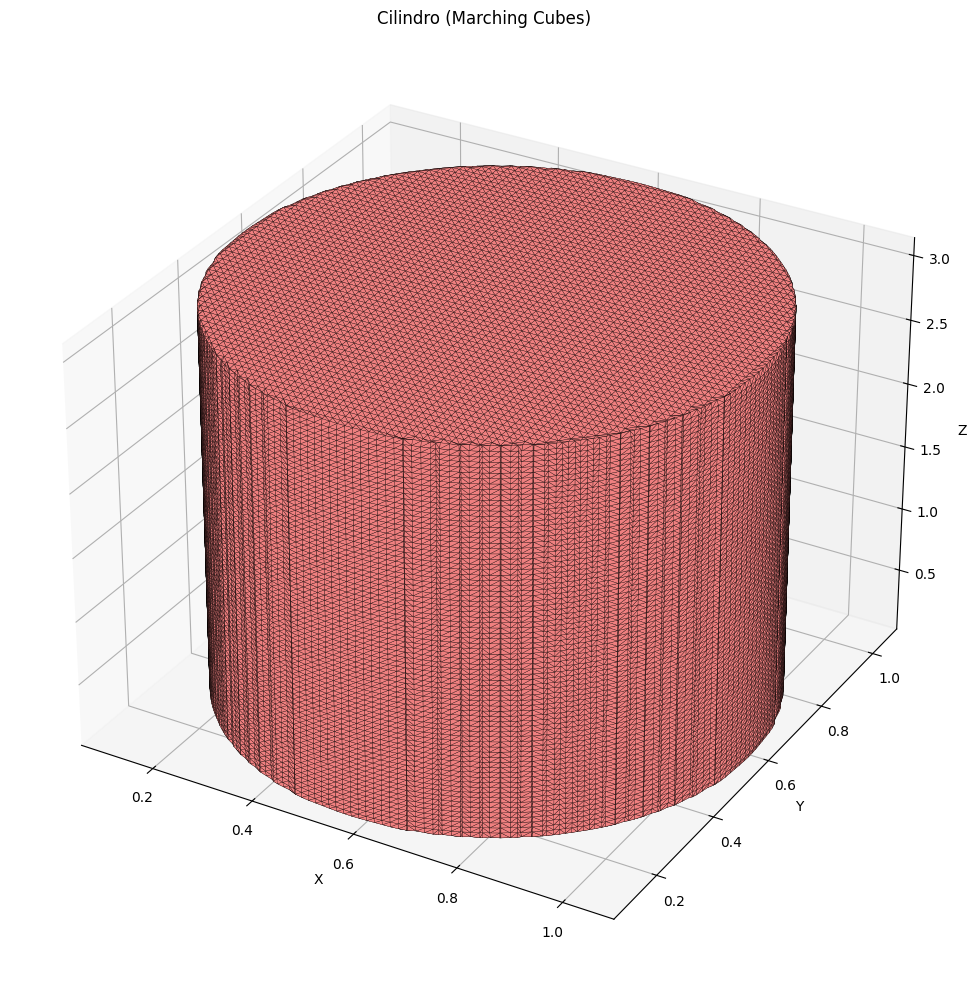

In [14]:
# Cilindro
import numpy as np
from Objetos.Cilindro import plotar_cilindro_marching_cubes

plotar_cilindro_marching_cubes(raio=0.5, altura=3.0, grid_size=80)


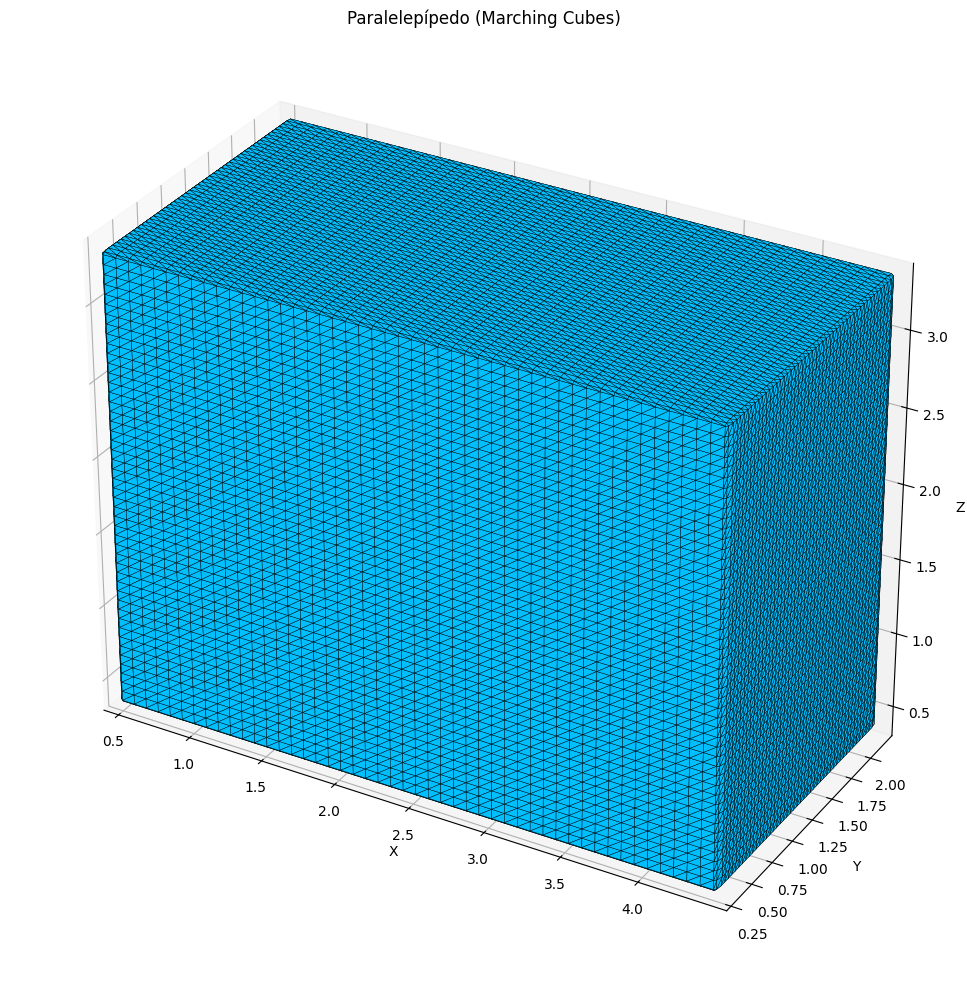

In [15]:
# Paralelepípedo
from Objetos.Paralelepipedo import plotar_paralelepipedo_marching_cubes


plotar_paralelepipedo_marching_cubes(comprimento=4, largura=2, altura=3, grid_size=60)


Questão 02

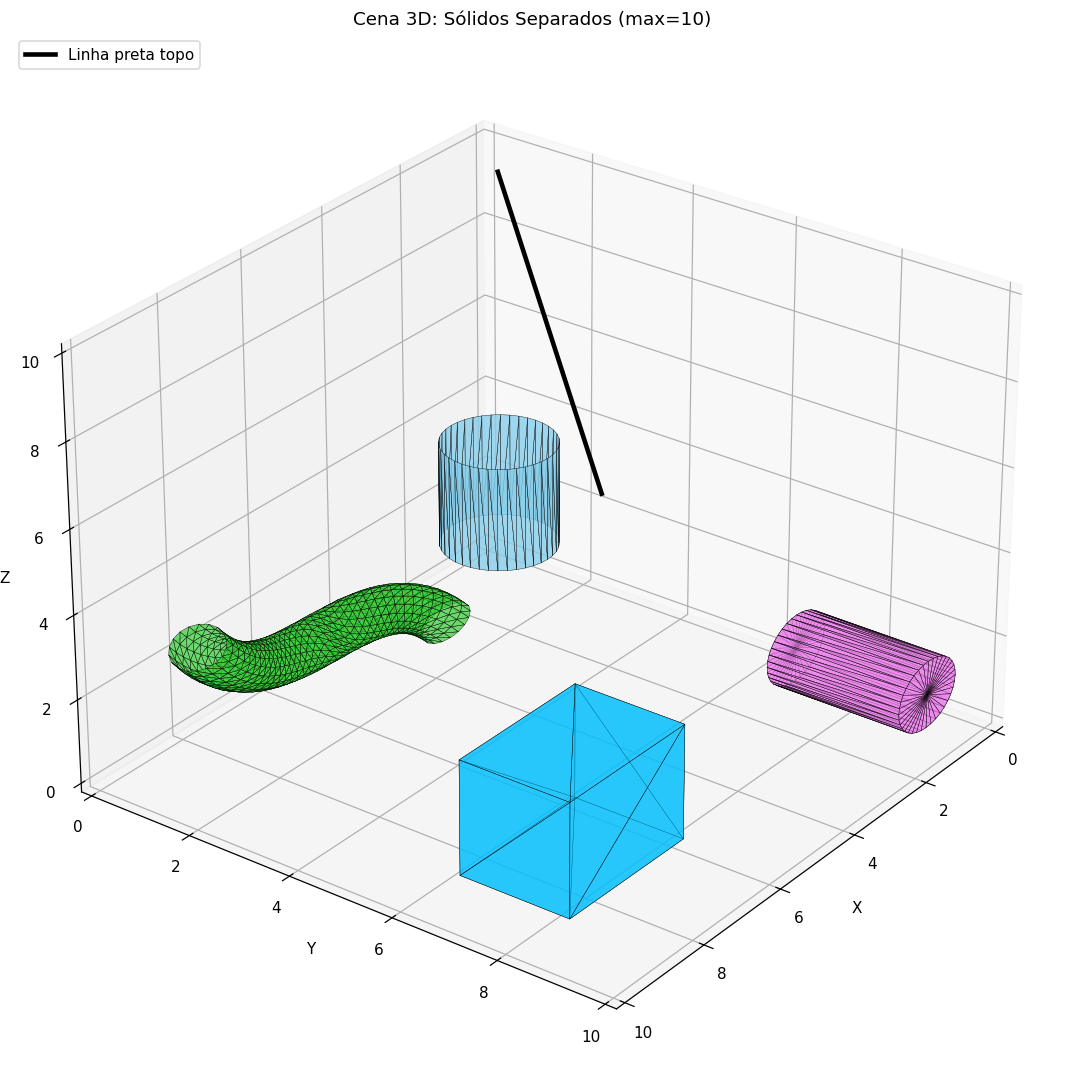

In [ ]:
import numpy as np
from Objetos.Cano_curvado import constroi_faces_sem_tampas, constroi_vertices_cano_curvado 
from Objetos.Cano_reto import constroi_faces_cano_reto, constroi_vertices_cano_reto
from Objetos.Cilindro import constroi_faces_cilindro, constroi_vertices_cilindro
from Objetos.Paralelepipedo import constroi_faces_paralelepipedo, constroi_vertices_paralelepipedo
from Utils.transformacao import transformar
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

objetos = []

# CANO RETO - canto inferior esquerdo
v_cano = constroi_vertices_cano_reto(raio=1, comprimento=2.5, n_segments=40)[:, :3]
f_cano = constroi_faces_cano_reto(n_segments=40)
v_cano = transformar(v_cano, escala=1.0, translacao=[1.0, 1.0, 1.0])
objetos.append(('Cano reto', v_cano, f_cano, 'skyblue', 0.8))

# CANO CURVADO - canto, ajuste final
pontos_ctrl = np.array([[0,0,0],[1,2,1],[2,-2,2],[4,1,2]])
v_curv = constroi_vertices_cano_curvado(raio=0.5, pontos_ctrl=pontos_ctrl, n_amostras=40, n_lados=18)[:, :3]
f_curv = constroi_faces_sem_tampas(n_amostras=40, n_lados=18)
v_curv = transformar(
    v_curv,
    escala=1.0,
    rotacao=np.array([[1,0,0],[0,0,-1],[0,1,0]]),
    translacao=[3.8, 2.2, 1.0]   # <-- ajuste fino: mais afastado do cilindro!
)
objetos.append(('Cano curvado', v_curv, f_curv, 'limegreen', 0.7))

# CILINDRO - canto superior esquerdo
v_cil = constroi_vertices_cilindro(raio=0.7, altura=2.2, n_segments=36)[:, :3]
f_cil = constroi_faces_cilindro(n_segments=36)
v_cil = transformar(v_cil, escala=1.15, rotacao=np.array([[1,0,0],[0,0,1],[0,-1,0]]), translacao=[1.0, 7.0, 1.0])
objetos.append(('Cilindro', v_cil, f_cil, 'violet', 0.7))

# PARALELEPÍPEDO - canto superior direito
v_paral = constroi_vertices_paralelepipedo(comprimento=1.4, largura=1.0, altura=1.3)[:, :3]
f_paral = constroi_faces_paralelepipedo()
v_paral = transformar(v_paral, escala=2.1, translacao=[7.0, 7.0, 1.0])
objetos.append(('Paralelepipedo', v_paral, f_paral, 'deepskyblue', 0.6))

# LINHA RETA preta no topo (diagonal acima de todos)
linha = np.array([[1.0, 1.0, 10.0], [9.0, 9.0, 10.0]])
objetos.append(('Linha preta topo', linha, None, 'black', 1.0))

# --- Escala global para max == 10
all_points = np.vstack([obj[1] if obj[2] is not None else obj[1] for obj in objetos])
max_all = np.max(all_points, axis=0)
fator_escala = 10.0 / max_all.max()

for idx, (nome, verts, faces, cor, alpha) in enumerate(objetos):
    verts = verts * fator_escala
    objetos[idx] = (nome, verts, faces, cor, alpha)

# --- Matplotlib 3D plot ---
fig = plt.figure(figsize=(10, 10), dpi=110)
ax = fig.add_subplot(111, projection='3d')

for nome, verts, faces, cor, alpha in objetos:
    if faces is not None:
        poly3d = [[verts[i] for i in face] for face in faces]
        collection = Poly3DCollection(poly3d, facecolors=cor, edgecolors="k", linewidths=0.25, alpha=alpha)
        ax.add_collection3d(collection)
    else:
        ax.plot(verts[:,0], verts[:,1], verts[:,2], color=cor, linewidth=3, label=nome)

# Eixos e limites
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cena 3D: Sólidos (max=10)')
ax.view_init(elev=28, azim=37)

handles, labels = ax.get_legend_handles_labels()
if handles:
    ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

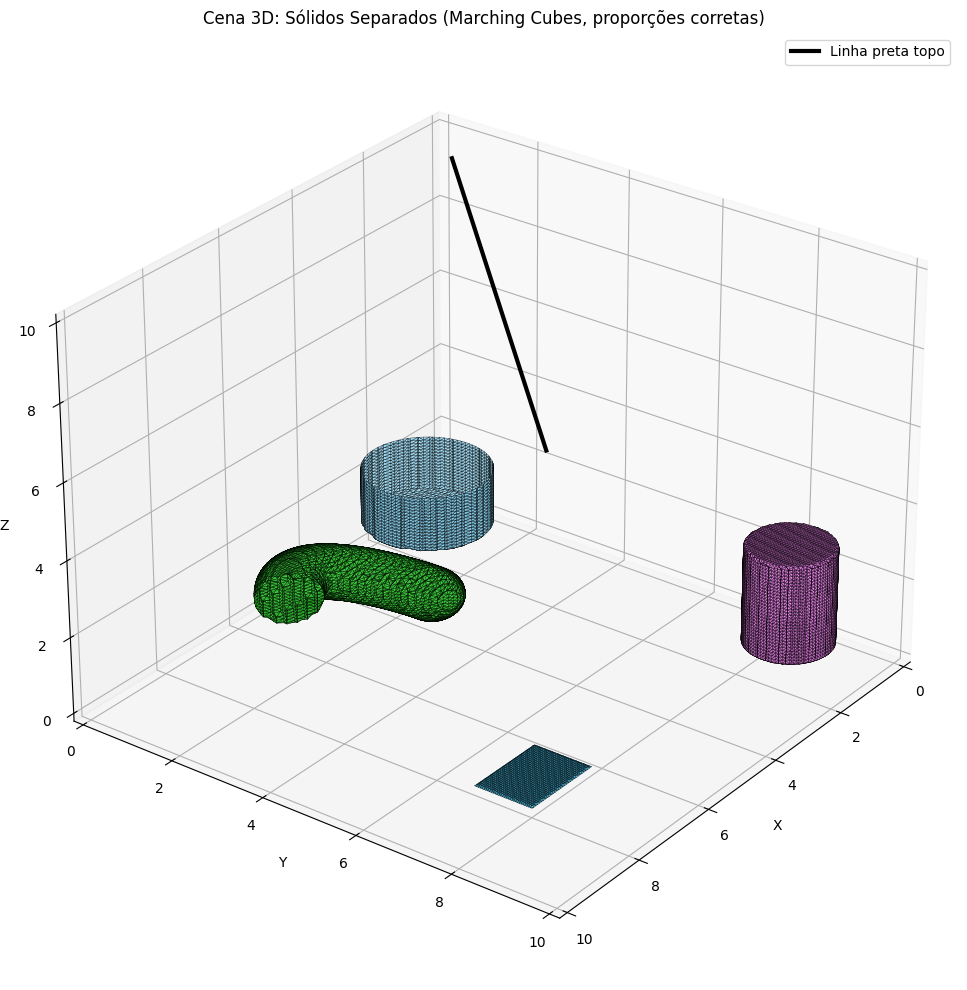

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage.measure import marching_cubes

# 1. Defina os "tamanhos naturais" dos objetos (iguais aos do poligonal)
parametros = {
    'cano_curvado':   dict(raio=0.5, pontos_ctrl=np.array([[0,0,0],[1,2,1],[2,-2,2],[4,1,2]]), n_amostras=100),
    'cano_reto':      dict(raio=1, comprimento=2.5),
    'cilindro':       dict(raio=0.7, altura=2.2),
    'paralelepipedo': dict(comprimento=1.4, largura=1.0, altura=1.3),
}

# 2. Primeiro, gere todos os objetos no centro local e armazene vértices e faces
objetos = []

# Cano curvado
from Objetos.Cano_curvado import curva_bezier, campo_cano_curvado
p = parametros['cano_curvado']
caminho = curva_bezier(p['pontos_ctrl'], p['n_amostras'])
min_xyz = caminho.min(axis=0) - p['raio']*1.2
max_xyz = caminho.max(axis=0) + p['raio']*1.2
x = np.linspace(min_xyz[0], max_xyz[0], 48)
y = np.linspace(min_xyz[1], max_xyz[1], 48)
z = np.linspace(min_xyz[2], max_xyz[2], 48)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
field = campo_cano_curvado(X, Y, Z, caminho, p['raio'], margin=10)
verts, faces, _, _ = marching_cubes(field, level=0.0, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))
objetos.append(('Cano curvado', verts, faces, 'limegreen', 0.7, [3.8, 2.2, 1.0]))

# Cano reto
from Objetos.Cano_reto import campo_cano_reto
p = parametros['cano_reto']
x = np.linspace(-p['comprimento']/2 - p['raio'], p['comprimento']/2 + p['raio'], 36)
y = np.linspace(-p['raio']*1.2, p['raio']*1.2, 36)
z = np.linspace(-p['raio']*1.2, p['raio']*1.2, 36)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
field = campo_cano_reto(X, Y, Z, p['raio'], p['comprimento'])
verts, faces, _, _ = marching_cubes(field, level=0.0, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))
objetos.append(('Cano reto', verts, faces, 'skyblue', 0.8, [1.0, 1.0, 1.0]))

# Cilindro
from Objetos.Cilindro import campo_cilindro
p = parametros['cilindro']
x = np.linspace(-p['raio']*1.2, p['raio']*1.2, 36)
y = np.linspace(-p['raio']*1.2, p['raio']*1.2, 36)
z = np.linspace(-0.1, p['altura']*1.1, 36)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
field = campo_cilindro(X, Y, Z, p['raio'], p['altura'])
verts, faces, _, _ = marching_cubes(field, level=0.0, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))
objetos.append(('Cilindro', verts, faces, 'violet', 0.7, [1.0, 7.0, 1.0]))

# Paralelepípedo
from Objetos.Paralelepipedo import campo_paralelepipedo
p = parametros['paralelepipedo']
x = np.linspace(-p['comprimento']/2, p['comprimento']/2, 32)
y = np.linspace(-p['largura']/2, p['largura']/2, 32)
z = np.linspace(0, p['altura'], 32)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
field = campo_paralelepipedo(X, Y, Z, p['comprimento'], p['largura'], p['altura'])
verts, faces, _, _ = marching_cubes(field, level=0.0, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))
objetos.append(('Paralelepípedo', verts, faces, 'deepskyblue', 0.6, [7.0, 7.0, 1.0]))

# 3. Escala global para garantir que todos caibam em [0,10]^3
all_points = np.vstack([obj[1] + obj[5] for obj in objetos])
max_all = np.max(all_points, axis=0)
fator_escala = 10.0 / max_all.max()

# 4. Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for nome, verts, faces, cor, alpha, translacao in objetos:
    verts = verts * fator_escala + np.array(translacao) * fator_escala
    poly3d = [verts[face] for face in faces]
    collection = Poly3DCollection(poly3d, facecolors=cor, edgecolors="k", linewidths=0.22, alpha=alpha)
    ax.add_collection3d(collection)

# Linha preta no topo
ax.plot([1, 9], [1, 9], [10, 10], color='black', linewidth=3, label='Linha preta topo')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cena 3D: Sólidos Separados (Marching Cubes, proporções corretas)')
ax.view_init(elev=28, azim=37)
ax.legend()
plt.tight_layout()
plt.show()